In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# 데이터 파일 리스트 생성
data_path = '/Users/jihyeok/workspace/AMI/KSC/data'
file_list = os.listdir(data_path)
xlsx_list = [file for file in file_list if file[-5:]=='.xlsx']

In [3]:
# 데이터 불러와 concat
df_list = [pd.read_excel(f'{data_path}/{file}') for file in xlsx_list]
df = pd.concat(df_list).iloc[:,1:]
df

,Date,Time,Day of the week,Weekdays or Weekend,AveragePower,ta,taQcflg,rn,rnQcflg,ws,...,ss,ssQcflg,icsr,dsnw,dc10Tca,dc10LmcsCa,clfmAbbrCd,vs,ts,tsQcflg
0,2022-09-01,00:00,3,Weekdays,52.315158,20.3,NaN,0.0,9.0,1.6,...,0.0,9,0.00,0.0,4,4,NaN,2000,18.9,NaN
1,2022-09-01,01:00,3,Weekdays,51.916057,20.0,NaN,0.0,NaN,1.2,...,0.0,9,0.00,0.0,7,5,NaN,2000,18.5,NaN
2,2022-09-01,02:00,3,Weekdays,47.919851,19.6,NaN,0.0,NaN,1.3,...,0.0,9,0.00,0.0,5,2,NaN,2000,18.1,NaN
3,2022-09-01,03:00,3,Weekdays,47.297568,19.3,NaN,0.0,NaN,1.4,...,0.0,9,0.00,0.0,0,0,NaN,2000,17.7,NaN
4,2022-09-01,04:00,3,Weekdays,45.504700,19.0,NaN,0.0,NaN,1.5,...,0.0,9,0.00,0.0,1,0,Ci,2000,17.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2022-06-30,19:00,3,Weekdays,63.447704,21.2,NaN,2.2,NaN,3.2,...,0.0,0,0.15,0.0,10,7,StNs,793,21.7,NaN
716,2022-06-30,20:00,3,Weekdays,69.701937,21.3,NaN,2.7,NaN,2.9,...,0.0,0,0.01,0.0,10,5,StNs,428,21.3,NaN
717,2022-06-30,21:00,3,Weekdays,60.839280,21.4,NaN,1.0,NaN,1.9,...,0.0,9,0.00,0.0,10,6,StNs,501,21.4,NaN
718,2022-06-30,22:00,3,Weekdays,62.332117,21.5,NaN,1.0,NaN,1.5,...,0.0,9,0.00,0.0,10,6,StNs,1971,21.5,NaN


In [4]:
df.shape

(13632, 25)

In [5]:
# 시간 feature
df.index = pd.to_datetime(df.Date + df.Time, format="%Y-%m-%d%H:%M")
df = df.sort_index()
df = df.drop(['Date', 'Time'], axis=1)
df

,Day of the week,Weekdays or Weekend,AveragePower,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,wd,...,ss,ssQcflg,icsr,dsnw,dc10Tca,dc10LmcsCa,clfmAbbrCd,vs,ts,tsQcflg
2022-03-01 00:00:00,1,Weekend,119.826162,7.2,NaN,0.0,NaN,2.0,NaN,230,...,0.0,9,0.00,0.0,6,6,NaN,2000,0.3,NaN
2022-03-01 01:00:00,1,Weekend,114.745904,7.0,NaN,0.0,NaN,0.5,NaN,230,...,0.0,9,0.00,0.0,9,9,NaN,2000,0.5,NaN
2022-03-01 02:00:00,1,Weekend,102.953198,7.2,NaN,0.0,9.0,1.5,NaN,200,...,0.0,9,0.00,0.0,10,8,ScAs,2000,1.5,NaN
2022-03-01 03:00:00,1,Weekend,98.354867,7.2,NaN,0.0,NaN,2.0,NaN,180,...,0.0,9,0.00,0.0,10,8,StNs,2000,1.9,NaN
2022-03-01 04:00:00,1,Weekend,88.555651,6.5,NaN,0.0,9.0,1.9,NaN,250,...,0.0,9,0.00,0.0,10,8,StNs,1753,2.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 19:00:00,1,Weekdays,99.415775,24.8,NaN,0.0,NaN,2.6,NaN,290,...,0.0,0,0.01,0.0,10,6,NaN,2000,23.7,NaN
2023-09-19 20:00:00,1,Weekdays,92.845836,24.5,NaN,0.0,NaN,2.0,NaN,290,...,0.0,9,0.00,0.0,9,0,NaN,1763,23.3,NaN
2023-09-19 21:00:00,1,Weekdays,80.136605,24.2,NaN,0.0,NaN,0.3,NaN,0,...,0.0,9,0.00,0.0,9,9,Ac,1312,22.9,NaN
2023-09-19 22:00:00,1,Weekdays,73.510437,24.1,NaN,0.0,NaN,1.2,NaN,270,...,0.0,9,0.00,0.0,10,1,NaN,1315,23.0,NaN


In [6]:
# 시간 벡터화

# 시간 정보 추출
timeIndex = df.index
day = timeIndex.day
days_in_month = timeIndex.days_in_month
month = timeIndex.month

# 벡터화 함수 정의
def vectorize(x): return (np.sin(2*np.pi*x), np.cos(2*np.pi*x))

# Sin, Cos 변환
df['day_month_x'], df['day_month_y'] = vectorize(np.array(day) / np.array(days_in_month))
df['day_year_x'], df['day_year_y'] = vectorize(day / 365)
df['month_x'], df['month_y'] = vectorize(month / 24)
df

,Day of the week,Weekdays or Weekend,AveragePower,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,wd,...,clfmAbbrCd,vs,ts,tsQcflg,day_month_x,day_month_y,day_year_x,day_year_y,month_x,month_y
2022-03-01 00:00:00,1,Weekend,119.826162,7.2,NaN,0.0,NaN,2.0,NaN,230,...,NaN,2000,0.3,NaN,0.201299,0.979530,0.017213,0.999852,0.707107,0.707107
2022-03-01 01:00:00,1,Weekend,114.745904,7.0,NaN,0.0,NaN,0.5,NaN,230,...,NaN,2000,0.5,NaN,0.201299,0.979530,0.017213,0.999852,0.707107,0.707107
2022-03-01 02:00:00,1,Weekend,102.953198,7.2,NaN,0.0,9.0,1.5,NaN,200,...,ScAs,2000,1.5,NaN,0.201299,0.979530,0.017213,0.999852,0.707107,0.707107
2022-03-01 03:00:00,1,Weekend,98.354867,7.2,NaN,0.0,NaN,2.0,NaN,180,...,StNs,2000,1.9,NaN,0.201299,0.979530,0.017213,0.999852,0.707107,0.707107
2022-03-01 04:00:00,1,Weekend,88.555651,6.5,NaN,0.0,9.0,1.9,NaN,250,...,StNs,1753,2.3,NaN,0.201299,0.979530,0.017213,0.999852,0.707107,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 19:00:00,1,Weekdays,99.415775,24.8,NaN,0.0,NaN,2.6,NaN,290,...,NaN,2000,23.7,NaN,-0.743145,-0.669131,0.321270,0.946988,0.707107,-0.707107
2023-09-19 20:00:00,1,Weekdays,92.845836,24.5,NaN,0.0,NaN,2.0,NaN,290,...,NaN,1763,23.3,NaN,-0.743145,-0.669131,0.321270,0.946988,0.707107,-0.707107
2023-09-19 21:00:00,1,Weekdays,80.136605,24.2,NaN,0.0,NaN,0.3,NaN,0,...,Ac,1312,22.9,NaN,-0.743145,-0.669131,0.321270,0.946988,0.707107,-0.707107
2023-09-19 22:00:00,1,Weekdays,73.510437,24.1,NaN,0.0,NaN,1.2,NaN,270,...,NaN,1315,23.0,NaN,-0.743145,-0.669131,0.321270,0.946988,0.707107,-0.707107


In [7]:
# 요일 원-핫 인코딩
day_of_week = pd.get_dummies(timeIndex.dayofweek, dtype=int, prefix='day_')
day_of_week.index = timeIndex

# concat
df = pd.concat([df, day_of_week], axis=1)
df = df.drop('Day of the week', axis=1)
df

,Weekdays or Weekend,AveragePower,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,wd,wdQcflg,...,day_year_y,month_x,month_y,day__0,day__1,day__2,day__3,day__4,day__5,day__6
2022-03-01 00:00:00,Weekend,119.826162,7.2,NaN,0.0,NaN,2.0,NaN,230,NaN,...,0.999852,0.707107,0.707107,0,1,0,0,0,0,0
2022-03-01 01:00:00,Weekend,114.745904,7.0,NaN,0.0,NaN,0.5,NaN,230,NaN,...,0.999852,0.707107,0.707107,0,1,0,0,0,0,0
2022-03-01 02:00:00,Weekend,102.953198,7.2,NaN,0.0,9.0,1.5,NaN,200,NaN,...,0.999852,0.707107,0.707107,0,1,0,0,0,0,0
2022-03-01 03:00:00,Weekend,98.354867,7.2,NaN,0.0,NaN,2.0,NaN,180,NaN,...,0.999852,0.707107,0.707107,0,1,0,0,0,0,0
2022-03-01 04:00:00,Weekend,88.555651,6.5,NaN,0.0,9.0,1.9,NaN,250,NaN,...,0.999852,0.707107,0.707107,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 19:00:00,Weekdays,99.415775,24.8,NaN,0.0,NaN,2.6,NaN,290,NaN,...,0.946988,0.707107,-0.707107,0,1,0,0,0,0,0
2023-09-19 20:00:00,Weekdays,92.845836,24.5,NaN,0.0,NaN,2.0,NaN,290,NaN,...,0.946988,0.707107,-0.707107,0,1,0,0,0,0,0
2023-09-19 21:00:00,Weekdays,80.136605,24.2,NaN,0.0,NaN,0.3,NaN,0,NaN,...,0.946988,0.707107,-0.707107,0,1,0,0,0,0,0
2023-09-19 22:00:00,Weekdays,73.510437,24.1,NaN,0.0,NaN,1.2,NaN,270,NaN,...,0.946988,0.707107,-0.707107,0,1,0,0,0,0,0


In [8]:
# 평일 or 휴일 원-핫 인코딩
df['weekdays'] = df['Weekdays or Weekend']=='Weekdays'
df['weekend'] = df['Weekdays or Weekend']=='Weekend'
df.weekdays = df.weekdays.astype(int)
df.weekend = df.weekend.astype(int)
df = df.drop('Weekdays or Weekend', axis=1)
df

,AveragePower,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,wd,wdQcflg,hm,...,month_y,day__0,day__1,day__2,day__3,day__4,day__5,day__6,weekdays,weekend
2022-03-01 00:00:00,119.826162,7.2,NaN,0.0,NaN,2.0,NaN,230,NaN,55,...,0.707107,0,1,0,0,0,0,0,0,1
2022-03-01 01:00:00,114.745904,7.0,NaN,0.0,NaN,0.5,NaN,230,NaN,59,...,0.707107,0,1,0,0,0,0,0,0,1
2022-03-01 02:00:00,102.953198,7.2,NaN,0.0,9.0,1.5,NaN,200,NaN,62,...,0.707107,0,1,0,0,0,0,0,0,1
2022-03-01 03:00:00,98.354867,7.2,NaN,0.0,NaN,2.0,NaN,180,NaN,64,...,0.707107,0,1,0,0,0,0,0,0,1
2022-03-01 04:00:00,88.555651,6.5,NaN,0.0,9.0,1.9,NaN,250,NaN,77,...,0.707107,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 19:00:00,99.415775,24.8,NaN,0.0,NaN,2.6,NaN,290,NaN,79,...,-0.707107,0,1,0,0,0,0,0,1,0
2023-09-19 20:00:00,92.845836,24.5,NaN,0.0,NaN,2.0,NaN,290,NaN,81,...,-0.707107,0,1,0,0,0,0,0,1,0
2023-09-19 21:00:00,80.136605,24.2,NaN,0.0,NaN,0.3,NaN,0,NaN,83,...,-0.707107,0,1,0,0,0,0,0,1,0
2023-09-19 22:00:00,73.510437,24.1,NaN,0.0,NaN,1.2,NaN,270,NaN,85,...,-0.707107,0,1,0,0,0,0,0,1,0


In [9]:
# 풍향 벡터화
df['wd_x'], df['wd_y'] = vectorize(df.wd / 360)
df = df.drop('wd', axis=1)
df

,AveragePower,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,wdQcflg,hm,hmQcflg,...,day__1,day__2,day__3,day__4,day__5,day__6,weekdays,weekend,wd_x,wd_y
2022-03-01 00:00:00,119.826162,7.2,NaN,0.0,NaN,2.0,NaN,NaN,55,NaN,...,1,0,0,0,0,0,0,1,-7.660444e-01,-6.427876e-01
2022-03-01 01:00:00,114.745904,7.0,NaN,0.0,NaN,0.5,NaN,NaN,59,NaN,...,1,0,0,0,0,0,0,1,-7.660444e-01,-6.427876e-01
2022-03-01 02:00:00,102.953198,7.2,NaN,0.0,9.0,1.5,NaN,NaN,62,NaN,...,1,0,0,0,0,0,0,1,-3.420201e-01,-9.396926e-01
2022-03-01 03:00:00,98.354867,7.2,NaN,0.0,NaN,2.0,NaN,NaN,64,NaN,...,1,0,0,0,0,0,0,1,1.224647e-16,-1.000000e+00
2022-03-01 04:00:00,88.555651,6.5,NaN,0.0,9.0,1.9,NaN,NaN,77,NaN,...,1,0,0,0,0,0,0,1,-9.396926e-01,-3.420201e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 19:00:00,99.415775,24.8,NaN,0.0,NaN,2.6,NaN,NaN,79,NaN,...,1,0,0,0,0,0,1,0,-9.396926e-01,3.420201e-01
2023-09-19 20:00:00,92.845836,24.5,NaN,0.0,NaN,2.0,NaN,NaN,81,NaN,...,1,0,0,0,0,0,1,0,-9.396926e-01,3.420201e-01
2023-09-19 21:00:00,80.136605,24.2,NaN,0.0,NaN,0.3,NaN,NaN,83,NaN,...,1,0,0,0,0,0,1,0,0.000000e+00,1.000000e+00
2023-09-19 22:00:00,73.510437,24.1,NaN,0.0,NaN,1.2,NaN,NaN,85,NaN,...,1,0,0,0,0,0,1,0,-1.000000e+00,-1.836970e-16


In [10]:
# 운형 원-핫 인코딩 (중복 허용)
df.clfmAbbrCd = np.where(df.clfmAbbrCd.isnull(), '', df.clfmAbbrCd)
cloud_type = ['Ci', 'Cc', 'Cs', 'Ac', 'As', 'Ns', 'Sc', 'St', 'Cu', 'Cb']
for ct in cloud_type:
    df[f'ct_{ct}'] = df.clfmAbbrCd.str.contains(ct).astype(int)
df = df.drop('clfmAbbrCd', axis=1)
df

,AveragePower,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,wdQcflg,hm,hmQcflg,...,ct_Ci,ct_Cc,ct_Cs,ct_Ac,ct_As,ct_Ns,ct_Sc,ct_St,ct_Cu,ct_Cb
2022-03-01 00:00:00,119.826162,7.2,NaN,0.0,NaN,2.0,NaN,NaN,55,NaN,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 01:00:00,114.745904,7.0,NaN,0.0,NaN,0.5,NaN,NaN,59,NaN,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 02:00:00,102.953198,7.2,NaN,0.0,9.0,1.5,NaN,NaN,62,NaN,...,0,0,0,0,1,0,1,0,0,0
2022-03-01 03:00:00,98.354867,7.2,NaN,0.0,NaN,2.0,NaN,NaN,64,NaN,...,0,0,0,0,0,1,0,1,0,0
2022-03-01 04:00:00,88.555651,6.5,NaN,0.0,9.0,1.9,NaN,NaN,77,NaN,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 19:00:00,99.415775,24.8,NaN,0.0,NaN,2.6,NaN,NaN,79,NaN,...,0,0,0,0,0,0,0,0,0,0
2023-09-19 20:00:00,92.845836,24.5,NaN,0.0,NaN,2.0,NaN,NaN,81,NaN,...,0,0,0,0,0,0,0,0,0,0
2023-09-19 21:00:00,80.136605,24.2,NaN,0.0,NaN,0.3,NaN,NaN,83,NaN,...,0,0,0,1,0,0,0,0,0,0
2023-09-19 22:00:00,73.510437,24.1,NaN,0.0,NaN,1.2,NaN,NaN,85,NaN,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 가시거리(vs) feature
df.vs = 2000 - df.vs
df

,AveragePower,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,wdQcflg,hm,hmQcflg,...,ct_Ci,ct_Cc,ct_Cs,ct_Ac,ct_As,ct_Ns,ct_Sc,ct_St,ct_Cu,ct_Cb
2022-03-01 00:00:00,119.826162,7.2,NaN,0.0,NaN,2.0,NaN,NaN,55,NaN,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 01:00:00,114.745904,7.0,NaN,0.0,NaN,0.5,NaN,NaN,59,NaN,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 02:00:00,102.953198,7.2,NaN,0.0,9.0,1.5,NaN,NaN,62,NaN,...,0,0,0,0,1,0,1,0,0,0
2022-03-01 03:00:00,98.354867,7.2,NaN,0.0,NaN,2.0,NaN,NaN,64,NaN,...,0,0,0,0,0,1,0,1,0,0
2022-03-01 04:00:00,88.555651,6.5,NaN,0.0,9.0,1.9,NaN,NaN,77,NaN,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 19:00:00,99.415775,24.8,NaN,0.0,NaN,2.6,NaN,NaN,79,NaN,...,0,0,0,0,0,0,0,0,0,0
2023-09-19 20:00:00,92.845836,24.5,NaN,0.0,NaN,2.0,NaN,NaN,81,NaN,...,0,0,0,0,0,0,0,0,0,0
2023-09-19 21:00:00,80.136605,24.2,NaN,0.0,NaN,0.3,NaN,NaN,83,NaN,...,0,0,0,1,0,0,0,0,0,0
2023-09-19 22:00:00,73.510437,24.1,NaN,0.0,NaN,1.2,NaN,NaN,85,NaN,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 플래그값 기반 결측값 처리: 최근 3시간 평균으로 대체
targets = ['ta', 'rn', 'ws', 'hm', 'ts'] # wd는 결측값이 없으므로 제외, 일조량 플래그 무시
for target in targets:
    df[target] = np.where(df[f'{target}Qcflg']==9, df[target].shift(1).rolling(3).mean(), df[target])

# 플래그 feature 제거
df = df.drop(['taQcflg', 'rnQcflg', 'wsQcflg', 'wdQcflg', 'hmQcflg', 'ssQcflg', 'tsQcflg'], axis=1)
df

,AveragePower,ta,rn,ws,hm,ss,icsr,dsnw,dc10Tca,dc10LmcsCa,...,ct_Ci,ct_Cc,ct_Cs,ct_Ac,ct_As,ct_Ns,ct_Sc,ct_St,ct_Cu,ct_Cb
2022-03-01 00:00:00,119.826162,7.2,0.0,2.0,55.0,0.0,0.00,0.0,6,6,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 01:00:00,114.745904,7.0,0.0,0.5,59.0,0.0,0.00,0.0,9,9,...,0,0,0,0,0,0,0,0,0,0
2022-03-01 02:00:00,102.953198,7.2,NaN,1.5,62.0,0.0,0.00,0.0,10,8,...,0,0,0,0,1,0,1,0,0,0
2022-03-01 03:00:00,98.354867,7.2,0.0,2.0,64.0,0.0,0.00,0.0,10,8,...,0,0,0,0,0,1,0,1,0,0
2022-03-01 04:00:00,88.555651,6.5,0.0,1.9,77.0,0.0,0.00,0.0,10,8,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 19:00:00,99.415775,24.8,0.0,2.6,79.0,0.0,0.01,0.0,10,6,...,0,0,0,0,0,0,0,0,0,0
2023-09-19 20:00:00,92.845836,24.5,0.0,2.0,81.0,0.0,0.00,0.0,9,0,...,0,0,0,0,0,0,0,0,0,0
2023-09-19 21:00:00,80.136605,24.2,0.0,0.3,83.0,0.0,0.00,0.0,9,9,...,0,0,0,1,0,0,0,0,0,0
2023-09-19 22:00:00,73.510437,24.1,0.0,1.2,85.0,0.0,0.00,0.0,10,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# 24시간 간격으로 resample

# resample method - sum: 전기사용량, 강수량, 일조량, 일사량, 적설량, 운형 원-핫 인코딩(중복 허용이므로 sum 사용)
sum_list = ['AveragePower', 'rn', 'ss', 'icsr', 'dsnw', 
            'ct_Ci', 'ct_Cc', 'ct_Cs', 'ct_Ac', 'ct_As', 'ct_Ns', 'ct_Sc', 'ct_St', 'ct_Cu', 'ct_Cb']

# resample method - mean: 기온, 풍속, 습도, 전운량(10분위), 중하층운량(10분위), 가시거리, 지온, 시간 벡터, 풍향 벡터, 요일 원-핫 인코딩, 평/휴일 원-핫 인코딩
mean_list = ['ws', 'hm', 'dc10Tca', 'dc10LmcsCa', 'vs', 'ts', 'day_month_x', 'day_month_y', 'day_year_x', 'day_year_y', 'month_x', 
             'month_y', 'day__0', 'day__1', 'day__2', 'day__3', 'day__4', 'day__5', 'day__6', 'weekdays', 'weekend', 'wd_x', 'wd_y']

# resample
df_sum = df[sum_list].resample('24H').sum()
df_mean = df[mean_list].resample('24H').mean()
df_resampled = pd.concat([df_sum, df_mean], axis=1)
df_resampled

,AveragePower,rn,ss,icsr,dsnw,ct_Ci,ct_Cc,ct_Cs,ct_Ac,ct_As,...,day__1,day__2,day__3,day__4,day__5,day__6,weekdays,weekend,wd_x,wd_y
2022-03-01,3118.787858,4.033333,2.5,6.49,0.0,0,0,0,0,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.631300,-0.079373
2022-03-02,4484.162226,0.000000,10.7,19.53,0.0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.773385,-0.313895
2022-03-03,4004.804565,0.000000,10.6,19.16,0.0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.834277,-0.282229
2022-03-04,2484.763983,0.000000,3.7,10.65,0.0,3,0,0,1,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.081323,-0.071874
2022-03-05,0.000000,0.000000,10.5,20.26,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.937869,-0.005698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,2096.542920,2.133333,0.1,5.35,0.0,0,0,0,1,14,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.855381,0.478153
2023-09-16,1449.364409,30.000000,0.1,6.30,0.0,0,0,0,1,16,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.624741,0.522802
2023-09-17,1532.291780,11.800000,3.3,12.49,0.0,9,0,0,8,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.296609,0.338147
2023-09-18,2534.465702,0.000000,4.9,13.83,0.0,4,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.664575,0.149683


In [14]:
# 최근 사용량 및 이동평균 추가: 4일, 1주일, 2주일
df_resampled['power_yesterday'] = df_resampled.AveragePower.shift(1)
df_resampled['power_ema4'] = df_resampled.AveragePower.shift(1).ewm(4).mean()
df_resampled['power_ema7'] = df_resampled.AveragePower.shift(1).ewm(7).mean()
df_resampled['power_ema14'] = df_resampled.AveragePower.shift(1).ewm(14).mean()

# 이동평균이 계산되지 않는 시점과 AveragePower(=target value)가 수집되지 않은 시점 삭제
df_resampled = df_resampled.dropna()
df_resampled

,AveragePower,rn,ss,icsr,dsnw,ct_Ci,ct_Cc,ct_Cs,ct_Ac,ct_As,...,day__5,day__6,weekdays,weekend,wd_x,wd_y,power_yesterday,power_ema4,power_ema7,power_ema14
2022-03-02,4484.162226,0.000000,10.7,19.53,0.0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,-0.773385,-0.313895,3118.787858,3118.787858,3118.787858,3118.787858
2022-03-03,4004.804565,0.000000,10.6,19.16,0.0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,-0.834277,-0.282229,4484.162226,3877.329174,3846.987521,3825.015979
2022-03-04,2484.763983,0.000000,3.7,10.65,0.0,3,0,0,1,3,...,0.0,0.0,1.0,0.0,0.081323,-0.071874,4004.804565,3929.573186,3906.752555,3889.124429
2022-03-05,0.000000,0.000000,10.5,20.26,0.0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,-0.937869,-0.005698,2484.763983,3440.139174,3477.219724,3500.909464
2022-03-06,0.000000,0.000000,10.8,21.00,0.0,2,0,0,0,0,...,0.0,1.0,0.0,1.0,-0.937759,0.053003,0.000000,2416.775546,2584.876388,2700.942226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,2096.542920,2.133333,0.1,5.35,0.0,0,0,0,1,14,...,0.0,0.0,1.0,0.0,0.855381,0.478153,2320.783620,2295.144532,2234.868922,2173.180031
2023-09-16,1449.364409,30.000000,0.1,6.30,0.0,0,0,0,1,16,...,1.0,0.0,0.0,1.0,0.624741,0.522802,2096.542920,2255.424210,2217.578171,2168.070890
2023-09-17,1532.291780,11.800000,3.3,12.49,0.0,9,0,0,8,1,...,0.0,1.0,0.0,1.0,-0.296609,0.338147,1449.364409,2094.212250,2121.551451,2120.157125
2023-09-18,2534.465702,0.000000,4.9,13.83,0.0,4,0,0,1,0,...,0.0,0.0,1.0,0.0,-0.664575,0.149683,1532.291780,1981.828156,2047.893992,2080.966102


In [15]:
# 전처리한 데이터 저장
df_resampled.to_csv('/Users/jihyeok/workspace/AMI/KSC/data/preprocessed_data_v3.csv')

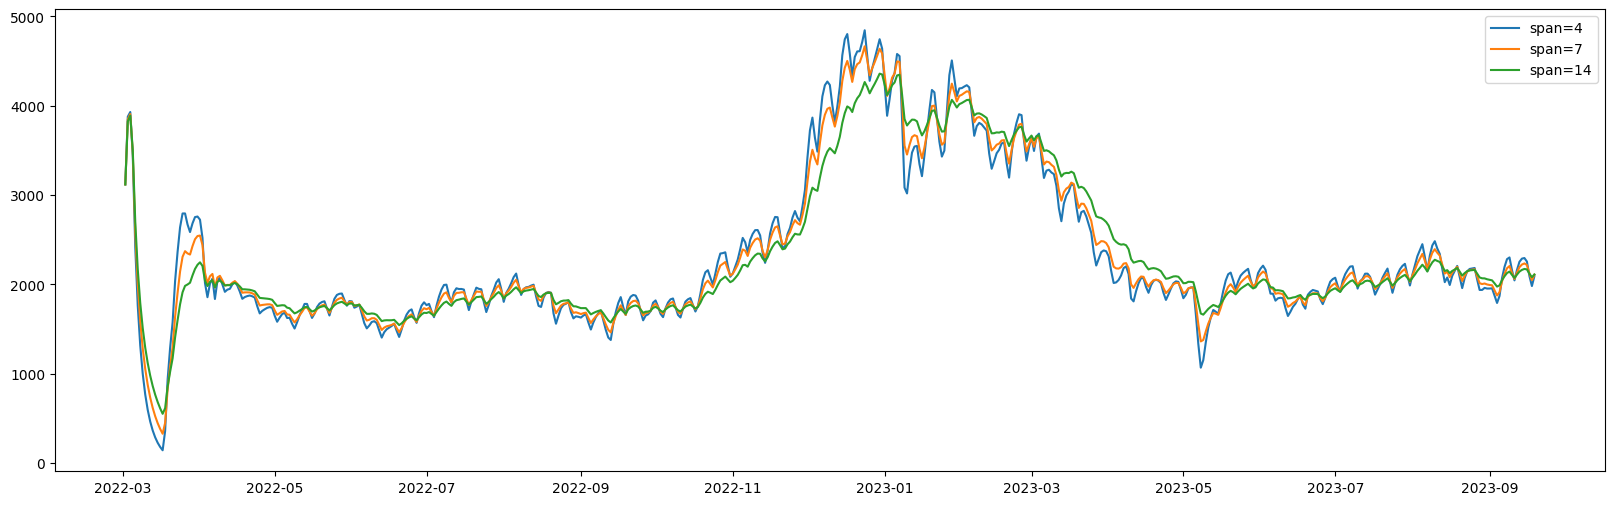

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(df_resampled.index, df_resampled.power_ema4, label='span=4')
plt.plot(df_resampled.index, df_resampled.power_ema7, label='span=7')
plt.plot(df_resampled.index, df_resampled.power_ema14, label='span=14')
plt.legend()
plt.show()